# kNN from scratch

In [ ]:
import numpy as np

In [ ]:
def euclidian_metric(X, x):
    d=np.sqrt(((X-x)**2).sum(axis = 1))
    return d


In [ ]:
def manhattan_metric(X, x):
    d = np.abs((X-x).sum(axis = 1))
    return d

In [ ]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [ ]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

In [ ]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Regression

In [ ]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        self.metric = metric
        self.k = k
        self.weights = weights

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        self.X_test = X_test
       
        def metrics(x_train, x, metric):
            if self.metric == "euclid":
                return np.sqrt(((x_train - x)**2).sum())
            if self.metric == "manhattan":
                return np.sum(np.abs(x_train - x))
        def predicted(x, X_train, y_train, k, weights):
            dist = []
            for i in range(len(X_train)):
                dist.append(metrics(X_train[i], x, self.metric))
            dist = np.array(dist)
            label = [y_train[i] for i in np.argsort(dist)[:k]]
            if self.weights == "uniform":
                return np.sum(label)/ k
            if self.weights == "distance":
                d = [dist[i] for i in np.argsort(dist)[:k]]
                return sum((1/d[i])*label[i] for i in range(k)) / sum(1/d[i] for i in range(k))

        y_pred = np.array([predicted(x, self.X_train, self.y_train, self.k, self.weights) for x in X_test])
        return y_pred

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

- Проверка для евклидовой метрики

In [ ]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [ ]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [ ]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [ ]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Linear regression from scratch


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

### Huber loss

In [ ]:
def huber_loss(x, y, w, delta):
    mse = 0.5*(y-x.dot(w))**2
    mae = delta * (np.abs(y - x.dot(w)) - 0.5 * delta)
    return np.where(np.abs(y - x.dot(w)) <= delta, mse, mae)
    pass

def huber_grad(x, y, w, delta):
    wd = 0
    diff=w@x-y
    if np.abs(diff) <= delta:
        wd += x*diff
    else:
        wd += delta*x*diff/np.abs(diff)
    
    return wd
    pass

In [ ]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [ ]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

In [ ]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
    def fit(self,X,y):
        self.X=X
        self.y=y
        self.w=np.zeros(self.X.shape[1])
        prev_w=[self.w]
        self.loss_history = []
        for i in range(self.max_iter):
            prev_w=self.w
            self.w-=self.eta*(self.calc_gradient(self.X,self.y))
            self.loss_history.append(self.calc_loss(self.X, self.y))
            if np.sum(self.w)-np.sum(prev_w):
                break
        return self.loss_history
        
    def predict(self, X_test):
        return self.w@X_test

    def calc_gradient(self,X, y):
        m_=0
        route=[]
        for i in range(len(x)):
            if abs(self.y[i] - self.w@X[i]) <= self.delta:
                return (-X[i] * (y[i] - self.w@X[i]))/len(x)
            else:
                return (np.sign(self.y[i]-self.w@X[i]) *(-X[i])*self.delta)/len(x)
    def calc_loss(self,X, y):
        loss=[]
        for i in range(len(x)):
            if abs(y[i] - self.w@self.X[i]) <= self.delta:
                loss.append(0.5*((y[i]-self.w@X[i])**2))
            else: 
                loss.append(self.delta * abs(y[i]-self.w@X[i]) - 0.5*(self.delta**2))
        return  np.mean(loss)

In [ ]:
lr = LinearRegressionHuber()

In [ ]:
loss_history = lr.fit(X_train, y_train)

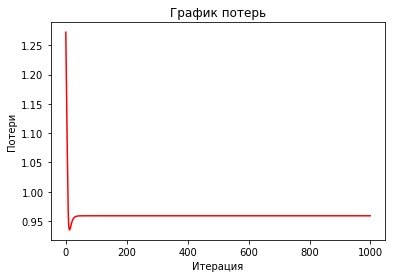

In [ ]:
plt.plot(range(len(loss_history)), loss_history, 'r')
plt.title("График потерь")
plt.xlabel("Итерация")
plt.ylabel("Потери")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

In [ ]:
data = pd.read_csv('house.csv', header=0)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.MiscFeature.head(20)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     Shed
6      NaN
7     Shed
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16    Shed
17    Shed
18     NaN
19     NaN
Name: MiscFeature, dtype: object

In [ ]:
data.drop('Id', axis=1, inplace=True)

In [ ]:
data.isna().sum().sum()

6965

In [ ]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [ ]:
percent =  data.isnull().sum() / data.shape[0]
mis_count = data.isnull().sum()        
table = pd.concat([mis_count, percent, data.dtypes], axis=1)
table = table.rename(columns = { 0 : 'Сумма', 1 : 'Доля', 2: 'Тип'})
table = table[table.iloc[:,1] != 0]
print(table)
print("Всего:", len(table))

              Сумма      Доля      Тип
LotFrontage     259  0.177397  float64
Alley          1369  0.937671   object
MasVnrType        8  0.005479   object
MasVnrArea        8  0.005479  float64
BsmtQual         37  0.025342   object
BsmtCond         37  0.025342   object
BsmtExposure     38  0.026027   object
BsmtFinType1     37  0.025342   object
BsmtFinType2     38  0.026027   object
Electrical        1  0.000685   object
FireplaceQu     690  0.472603   object
GarageType       81  0.055479   object
GarageYrBlt      81  0.055479  float64
GarageFinish     81  0.055479   object
GarageQual       81  0.055479   object
GarageCond       81  0.055479   object
PoolQC         1453  0.995205   object
Fence          1179  0.807534   object
MiscFeature    1406  0.963014   object
Всего: 19


In [ ]:
# В категориальных признаках смотрим на наличие похожих (или просто в файле с описанием...). 
# Например, если у бассейна нулевая площадь, то его качество - не пропуск, а указание на отсутствие бассейна.
# MiskFeature - тоже не отсутствие данных, а отсутствие дополнительных характеристик.
# Вещественные заменяем на медиану, т. к. не знаем распределения
# Misk
data.loc[(data["LotFrontage"].isnull()), ['LotFrontage']] = np.nanmean(data.LotFrontage)
data.loc[(data["Alley"].isnull()), ['Alley']] = "NoAlley"
data["MasVnrType"].replace(np.nan, max(set(data["MasVnrType"]), key = list(data["MasVnrType"]).count), inplace = True)
data.loc[(data["MasVnrArea"].isnull()), ['MasVnrArea']] = np.nanmedian(data["MasVnrArea"])
data.loc[(data["BsmtQual"].isnull()), ['BsmtQual']] = "NoBsmt"
data.loc[(data["BsmtCond"].isnull()), ['BsmtCond']] = "NoBsmt"
data.loc[(data["BsmtExposure"].isnull()), ['BsmtExposure']] = "NoBsmt"
data.loc[(data["BsmtFinType1"].isnull()), ['BsmtFinType1']] = "NoBsmt"
data.loc[(data["BsmtFinType2"].isnull()), ['BsmtFinType2']] = "NoBsmt"
data.drop(data[data['Electrical'].isnull()].index , inplace=True)
data.loc[(data["FireplaceQu"].isnull()), ['FireplaceQu']] = "NoFire"
data.loc[(data["GarageType"].isnull()), ['GarageType']] = "NoGarage"
data["GarageYrBlt"].replace(np.nan, int(max(set(data["GarageYrBlt"]), key = list(data["GarageYrBlt"]).count)), inplace = True)
data.loc[(data["GarageFinish"].isnull()), ['GarageFinish']] = "NoGarage"
data.loc[(data["GarageQual"].isnull()), ['GarageQual']] = "NoGarage"
data.loc[(data["GarageCond"].isnull()), ['GarageCond']] = "NoGarage"
data.loc[(data["PoolQC"].isnull()), ['PoolQC']] = "NoPool"
data.loc[(data["Fence"].isnull()), ['Fence']] = "NoFence"
data.loc[(data["MiscFeature"].isnull()), ['MiscFeature']] = "None"

In [ ]:
# Применим one-hot кодирование, заменив категориальные признаки на дамми (1/0) переменные
# data.select_dtypes(include = 'object')
# data = pd.get_dummies(data, drop_first=True)
# data.shape

In [ ]:
# А потом поймем, что из-за такого количества столбцов функции ниже умирают, и сделаем жизнь сложнее - переведем все в
# порядковую шкалу и перекодируем в numeric
data.replace({'LotShape': {'IR1': 0, 'IR2': 1, 'IR3':2, 'Reg':3},
                  'Utilities': {'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3},
                  'BsmtQual':{'NoBsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                  'BsmtCond':{'NoBsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                  'BsmtFinType1':{'NoBsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                  'BsmtFinType2':{'NoBsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                  'BsmtExposure': {"NoBsmt":0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'GarageFinish':{'NoGarage':0,'Unf':1,"RFn":2,"Fin":3},
                  'GarageQual':{'NoGarage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                  'GarageCond':{'NoGarage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                  'LandSlope':{'Sev':0,'Mod':1,'Gtl':2},
                  'ExterQual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
                  'ExterCond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
                  'HeatingQC':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
                  'KitchenQual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
                  'FireplaceQu':{'NoFire':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                  'PoolQC':{'NoPool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
                  'Fence':{'NoFence':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4},
                  'Functional': {'Sal':1, "Sev": 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ':8}},inplace=True)
data[['LotShape',"Functional",'Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','PoolQC','Fence','GarageYrBlt']] = data[['LotShape',"Functional",'Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','PoolQC','Fence','GarageYrBlt']].apply(pd.to_numeric)              


In [ ]:
y_train = data["SalePrice"]
data = pd.get_dummies(data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data.corr(method='pearson')

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.357145,-0.139766,0.119043,0.022836,0.025590,0.032936,-0.059134,0.027435,0.040199,...,0.014029,-0.045049,-0.014540,0.026216,0.005106,0.016262,0.030039,0.001027,0.024188,-0.050961
LotFrontage,-0.357145,1.000000,0.306804,-0.145029,-0.000002,-0.067630,0.234321,-0.052778,0.117546,0.082680,...,-0.051782,0.126613,-0.023457,-0.089969,-0.021822,-0.037015,-0.018082,0.015829,-0.072123,0.124875
LotArea,-0.139766,0.306804,1.000000,-0.165307,-0.010122,-0.436864,0.105786,-0.005665,0.014296,0.013852,...,-0.015044,0.020024,-0.005724,-0.002271,-0.029142,-0.013211,0.008961,-0.010787,0.005737,0.022620
LotShape,0.119043,-0.145029,-0.165307,1.000000,0.036094,0.099856,-0.190166,0.013964,-0.226800,-0.154468,...,0.002425,-0.038474,0.001877,0.021188,0.018943,0.011472,0.036084,0.034162,-0.005404,-0.037749
Utilities,0.022836,-0.000002,-0.010122,0.036094,1.000000,-0.005913,0.001895,-0.009986,0.011489,0.034074,...,0.001536,0.007911,0.001189,0.067075,-0.096031,0.001373,0.002385,0.003087,0.055978,0.008017
LandSlope,0.025590,-0.067630,-0.436864,0.099856,-0.005913,1.000000,0.066588,-0.010276,0.073496,0.058963,...,0.013241,0.059244,0.010249,-0.073514,-0.026398,0.011839,-0.034384,-0.037399,0.004258,0.042522
OverallQual,0.032936,0.234321,0.105786,-0.190166,0.001895,0.066588,1.000000,-0.092243,0.573334,0.551605,...,-0.021208,0.327328,-0.058000,-0.224861,-0.103708,-0.041715,-0.045010,-0.025585,-0.143069,0.323208
OverallCond,-0.059134,-0.052778,-0.005665,0.013964,-0.009986,-0.010276,-0.092243,1.000000,-0.375780,0.074158,...,-0.019802,-0.156301,-0.050683,0.163846,-0.046469,-0.038910,-0.033479,-0.023917,0.161835,-0.151786
YearBuilt,0.027435,0.117546,0.014296,-0.226800,0.011489,0.073496,0.573334,-0.375780,1.000000,0.592512,...,-0.023395,0.347360,0.012163,-0.238892,-0.110070,-0.045580,-0.010037,-0.035708,-0.158880,0.344304
YearRemodAdd,0.040199,0.082680,0.013852,-0.154468,0.034074,0.058963,0.551605,0.074158,0.592512,1.000000,...,-0.039925,0.326008,-0.011402,-0.183101,-0.135799,-0.040271,-0.020669,-0.047989,-0.120977,0.323199


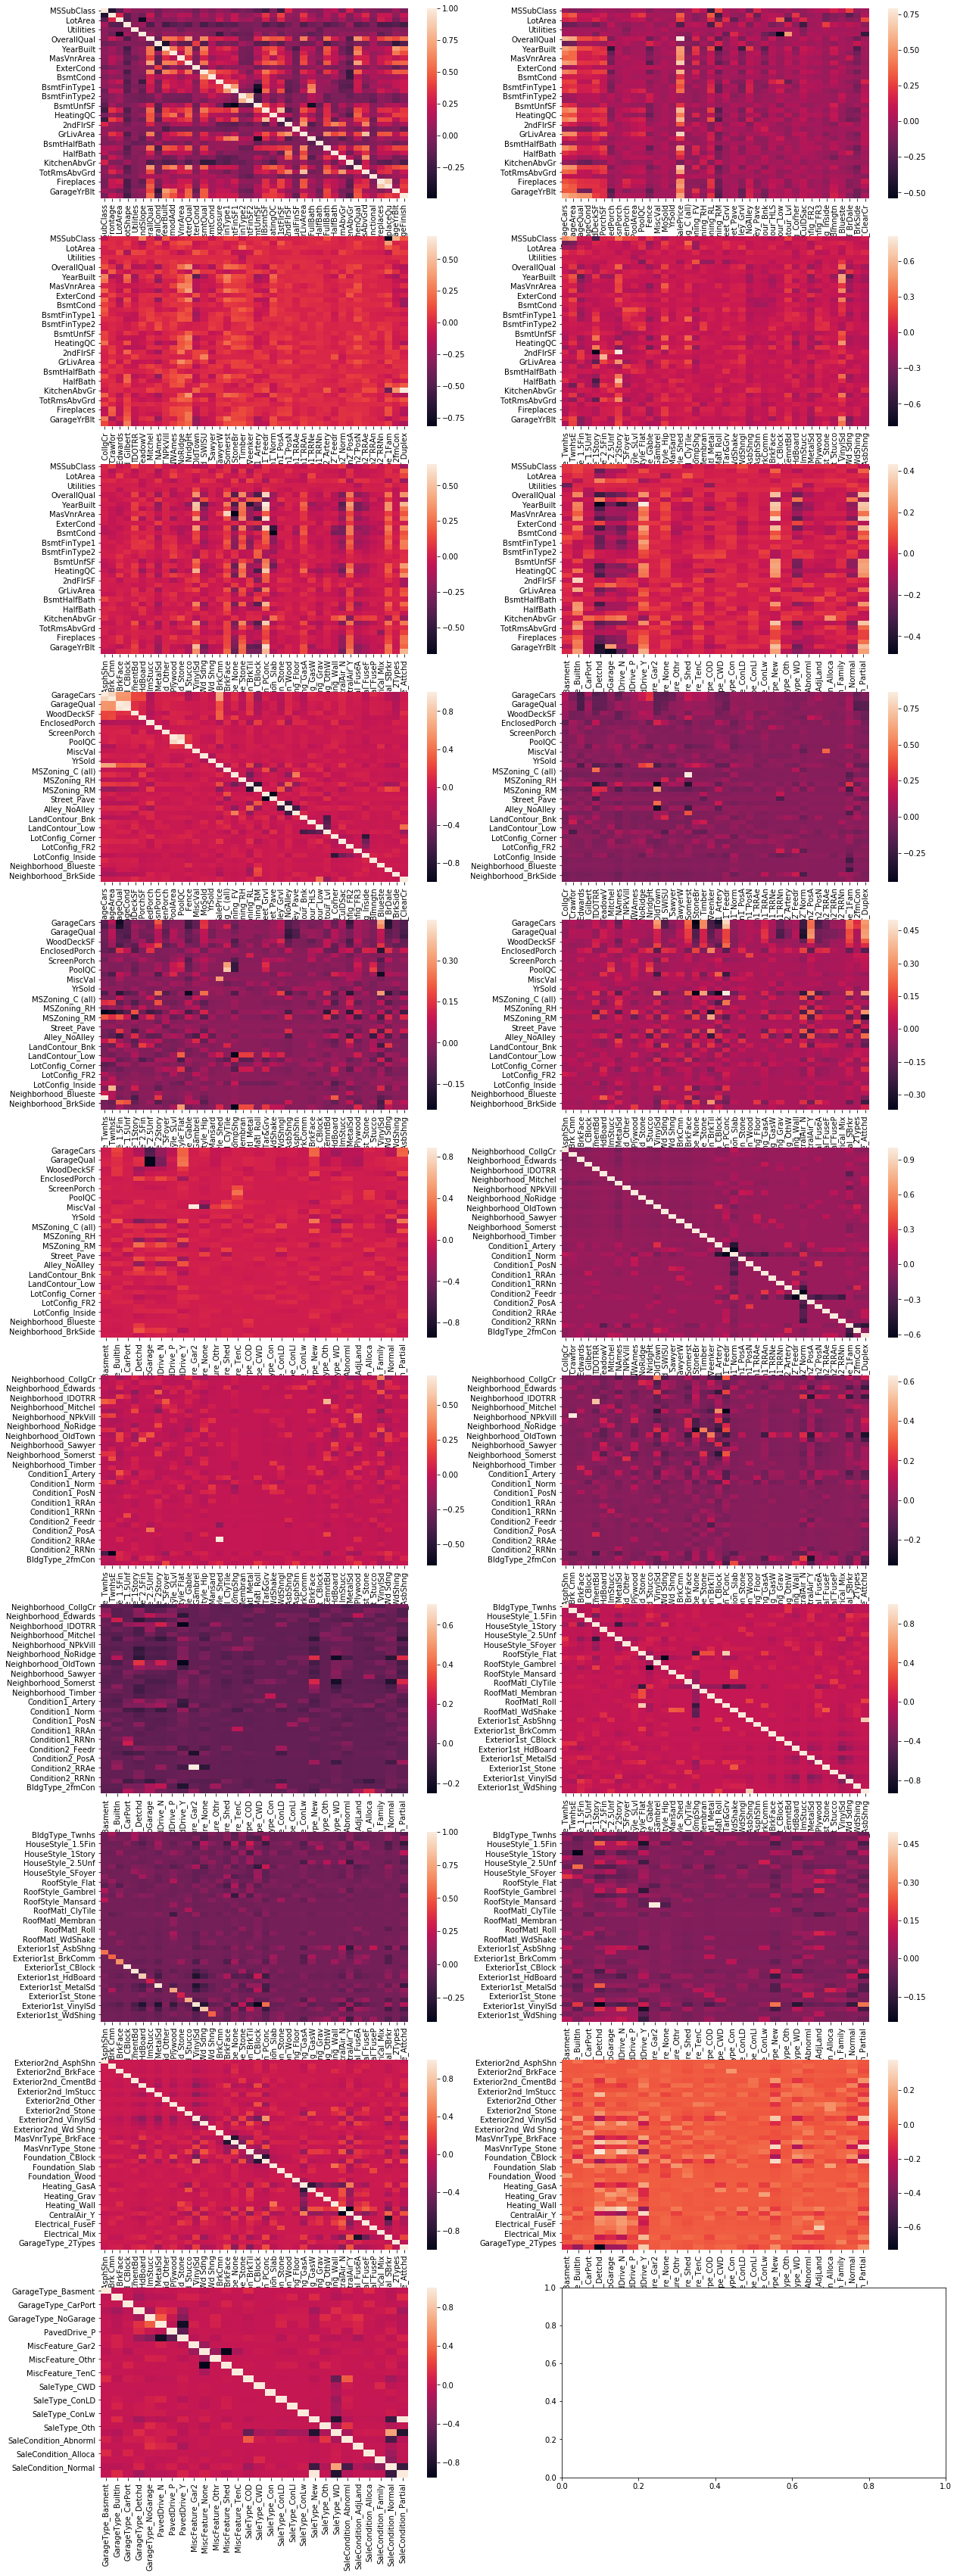

In [ ]:
d=data.corr(method='pearson')
fig, ax = plt.subplots(11, 2, figsize = (20, 60))
sns.heatmap(d.iloc[0:40, 0:40], ax = ax[0,0])
sns.heatmap(d.iloc[0:40, 40:80], ax = ax[0,1])
sns.heatmap(d.iloc[0:40, 80:120], ax = ax[1,0])
sns.heatmap(d.iloc[0:40, 120:160], ax = ax[1,1])
sns.heatmap(d.iloc[0:40, 160:200], ax = ax[2,0])
sns.heatmap(d.iloc[0:40, 200:240], ax = ax[2,1])
sns.heatmap(d.iloc[40:80, 40:80], ax = ax[3,0])
sns.heatmap(d.iloc[40:80, 80:120], ax = ax[3,1])
sns.heatmap(d.iloc[40:80, 120:160], ax = ax[4,0])
sns.heatmap(d.iloc[40:80, 160:200], ax = ax[4,1])
sns.heatmap(d.iloc[40:80, 200:240], ax = ax[5,0])
sns.heatmap(d.iloc[80:120, 80:120], ax = ax[5,1])
sns.heatmap(d.iloc[80:120, 120:160], ax = ax[6,0])
sns.heatmap(d.iloc[80:120, 160:200], ax = ax[6,1])
sns.heatmap(d.iloc[80:120, 200:240], ax = ax[7,0])
sns.heatmap(d.iloc[120:160, 120:160], ax = ax[7,1])
sns.heatmap(d.iloc[120:160, 160:200], ax = ax[8,0])
sns.heatmap(d.iloc[120:160, 200:240], ax = ax[8,1])
sns.heatmap(d.iloc[160:200, 160:200], ax = ax[9,0])
sns.heatmap(d.iloc[160:200, 200:240], ax = ax[9,1])
sns.heatmap(d.iloc[200:240, 200:240], ax = ax[10,0])
plt.show()

In [ ]:
y_train = data["SalePrice"]
abs(data.corrwith(y_train,method="pearson"))
abs(data.corrwith(y_train,method="pearson")).sort_values(ascending=True)

RoofMatl_Metal           0.000307
RoofStyle_Mansard        0.000316
Foundation_Wood          0.002706
Condition2_RRAe          0.002990
BldgType_TwnhsE          0.003771
LotConfig_Corner         0.004091
Condition1_RRNe          0.004580
MiscFeature_Gar2         0.004748
RoofMatl_Tar&Grv         0.004911
BsmtFinType2             0.005355
Condition1_RRAn          0.005877
LotConfig_FR2            0.006880
RoofMatl_ClyTile         0.006900
BsmtFinSF2               0.011412
Foundation_Stone         0.012110
Utilities                0.014317
SaleType_ConLI           0.014364
RoofMatl_Roll            0.014482
Condition2_RRAn          0.014514
Neighborhood_SawyerW     0.014537
SaleCondition_Alloca     0.015536
RoofStyle_Flat           0.016423
Exterior2nd_Stone        0.016761
BsmtHalfBath             0.016873
Exterior1st_Plywood      0.017753
LotConfig_FR3            0.018180
ExterCond                0.018872
Neighborhood_Blmngtn     0.019053
SaleType_CWD             0.019582
RoofMatl_Membr

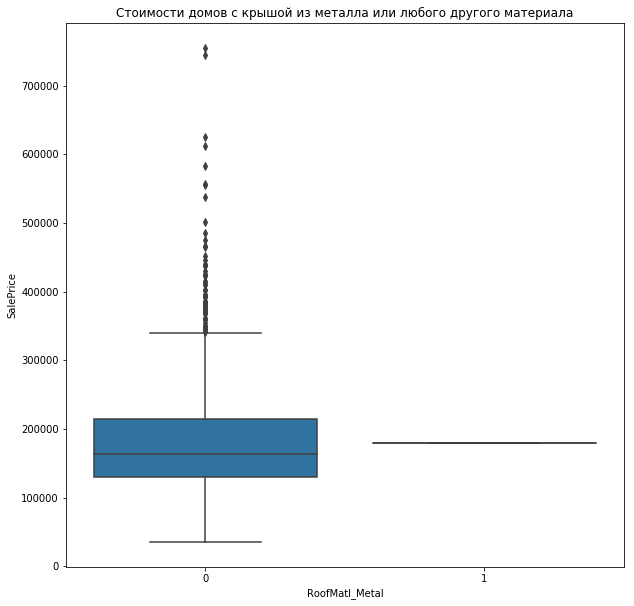

In [ ]:
# Переменная с наименьшей корреляцией бинарна - примает значение 1, крыша из метала, и 0 в любом другом случае.
# Поэтому здесь целесообразно смотреть отличие по группам, пользуясь боксплотом.
fig = plt.figure(figsize = (10,10))
ax = sns.boxplot(x="RoofMatl_Metal", y="SalePrice", data=data)
plt.title('Стоимости домов с крышой из металла или любого другого материала')
plt.show()

Text(0, 0.5, 'SalesPrice')

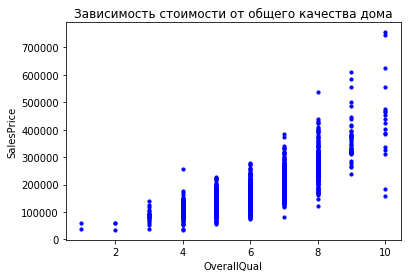

In [ ]:
# Здесь видим довольно очевидную корреляцию между общим качеством дома и его ценой 
plt.figure()
plt.scatter(data.OverallQual, y_train, s=10, color='blue')
plt.title('Зависимость стоимости от общего качества дома')
plt.xlabel('OverallQual') 
plt.ylabel('SalesPrice')

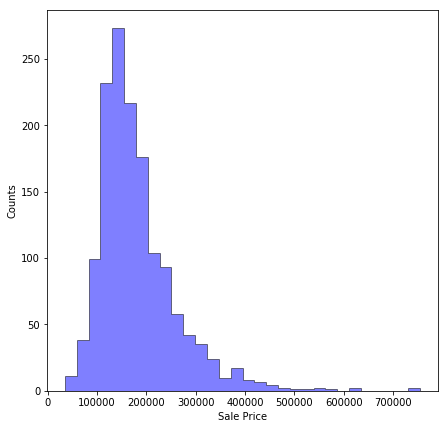

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.hist(data.SalePrice, bins=30, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='black');
plt.xlabel('Sale Price')
plt.ylabel('Counts')
plt.show()

In [ ]:
data.SalePrice=np.log1p(data.SalePrice)

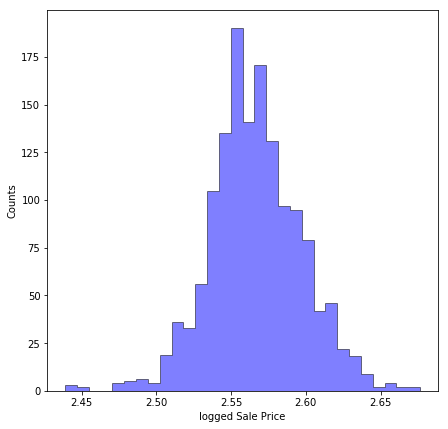

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.hist(np.log1p(data.SalePrice), bins=30, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='black');
plt.xlabel('logged Sale Price')
plt.ylabel('Counts')
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1),
                                                  np.log1p(data['SalePrice']), random_state=17032019)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1094, 227), (365, 227), (1094,), (365,))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
knn = KNeighborsRegressor(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)
predictions = knn.predict(X_val)
rms = sqrt(mean_squared_error(np.expm1(y_val), np.expm1(predictions)))
rms 

0.21307422091468925

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={'n_neighbors': range(1, 40, 1), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}, cv=5)
grid_searcher.fit(X_train, y_train)
best_predictions = grid_searcher.predict(X_val)
rms = sqrt(mean_squared_error(np.expm1(y_val), np.expm1(best_predictions)))
print(rms, grid_searcher.best_params_) 

0.19745442742304276 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [ ]:
LR=LinearRegression()
grid_searcher = GridSearchCV(LinearRegression(), param_grid={'fit_intercept': ['True', 'False'],}, cv=5)
grid_searcher.fit(X_train, y_train)
best_predictions = grid_searcher.predict(X_val)
lr=grid_searcher.best_estimator_.coef_
rms = sqrt(mean_squared_error(np.expm1(y_val), np.expm1(best_predictions)))
print(rms,grid_searcher.best_params_)

0.15864231585145472 {'fit_intercept': 'True'}


In [ ]:
grid_searcher = GridSearchCV(Ridge(),param_grid={'alpha':np.linspace(10, 1000, 1000),
                            'fit_intercept': ['True', 'False'],}, cv=5)
grid_searcher.fit(X_train, y_train)
best_predictions = grid_searcher.predict(X_val)
rms = sqrt(mean_squared_error(np.expm1(y_val), np.expm1(best_predictions)))
rc=grid_searcher.best_estimator_.coef_
print(rms,grid_searcher.best_params_)

0.12650319363330131 {'alpha': 12.972972972972972, 'fit_intercept': 'True'}


In [ ]:
grid_searcher = GridSearchCV(Lasso(max_iter=2500),param_grid={'alpha':np.linspace(5e-5, 1e-4, 1000),
                                                              'fit_intercept': ['True', 'False'],}, cv=10)
grid_searcher.fit(X_train, y_train)
best_predictions = grid_searcher.predict(X_val)
rms = sqrt(mean_squared_error(np.expm1(y_val), np.expm1(best_predictions)))
lc=grid_searcher.best_estimator_.coef_
print(rms,grid_searcher.best_params_)

0.12272339472318644 {'alpha': 5e-05, 'fit_intercept': 'True'}


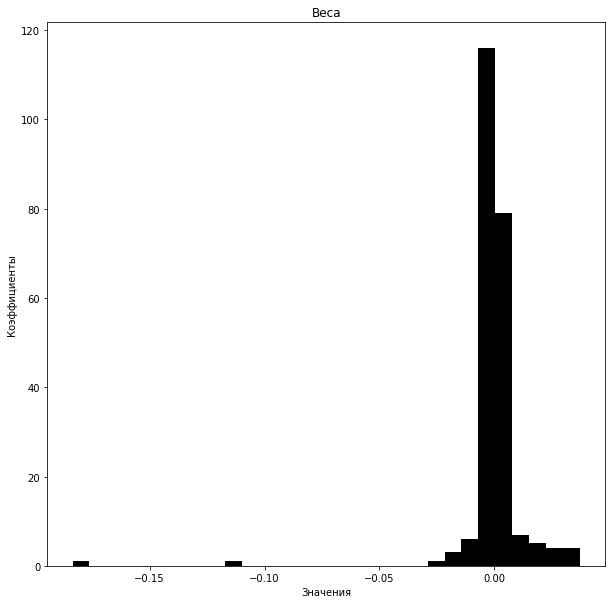

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.hist(lr, bins=30, alpha=1,
         histtype='stepfilled', color='black',
         edgecolor='none');
plt.xlabel('Значения')
plt.title("Веса")
plt.ylabel('Коэффициенты')
plt.show()

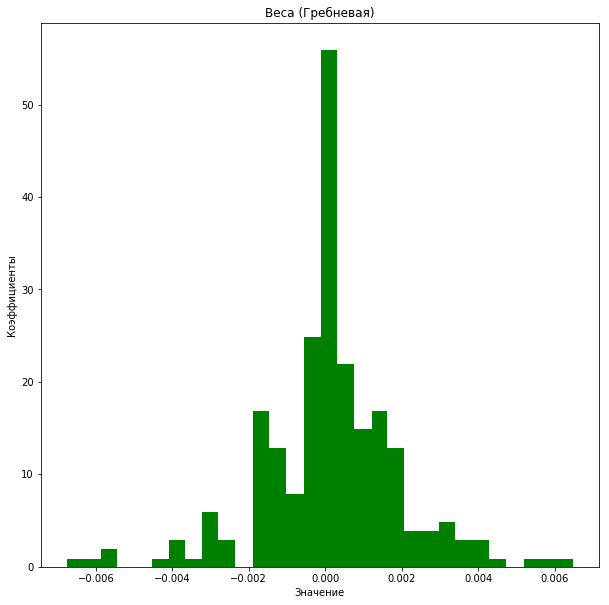

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.hist(rc, bins=30, alpha=1,
         histtype='stepfilled', color='green',
         edgecolor='white');
plt.xlabel('Значение')
plt.title("Веса (Гребневая)")
plt.ylabel('Коэффициенты')
plt.show()

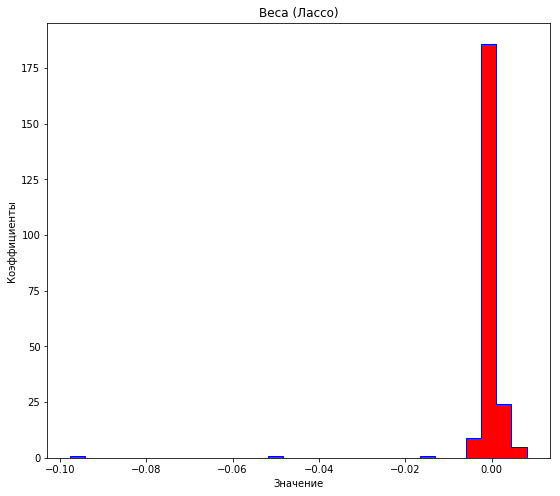

In [ ]:
fig = plt.figure(figsize = (9, 8))
plt.hist(lc, bins=30, alpha=1,
         histtype='stepfilled', color='red',
         edgecolor='blue');
plt.xlabel('Значение')
plt.title("Веса (Лассо)")
plt.ylabel('Коэффициенты')
plt.show()

In [ ]:
# Вариант с Лассо дает 0,124